In [68]:
### Importing essentials

import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

### Importing SciKit-Learn stuff

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.linear_model    import LinearRegression, Ridge, Lasso
from sklearn.compose         import make_column_transformer
from sklearn.pipeline        import make_pipeline
from sklearn.preprocessing   import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics         import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_log_error

In [2]:
df = pd.read_csv("../data/sampleSubmission.csv")
df_test = pd.read_csv("../data/test.csv")
df_train = pd.read_csv("../data/train.csv")

### Items learned during the week and trained below analysing the Washington Bike Share data

* $\bf{models}$: linear reg., ridge reg., lasso reg.

* $\bf feature\ engineering$: column_transformer, log transformation, polynomial features

* $\bf{metrics}$: $R^2$-score, RMSLE, 

* $\bf{plotting}$: residual plots

* $\bf{misc}$: datetime conversion, extracting various time units from datetime(e.g. year, month, weekday, etc.)

* $\bf{Further \ important \ stuff}$ to be trained: Regularization, cross validation, gradient descent

In [3]:
#df_train.head()

In [4]:
dt = pd.to_datetime(df_train.datetime)

In [5]:
df_train['year'] = pd.DatetimeIndex(df_train['datetime']).year
df_train['month'] = pd.DatetimeIndex(df_train['datetime']).month
df_train['weekday'] = pd.to_datetime(df_train["datetime"]).dt.strftime("%A")
df_train['hour'] = pd.to_datetime(df_train["datetime"]).dt.hour

In [6]:
#df_train.head()

In [7]:
df_train.drop(['casual', 'registered', 'datetime'], axis = 1, inplace= True)

In [8]:
#df_train.head()

In [9]:
df_train['log_count'] = np.log1p(df_train['count'])

In [10]:
df_train.drop(['count'], axis = 1, inplace = True)

In [11]:
#df_train.head()

In [12]:
X = df_train.drop('log_count',axis = 1)
y_log = df_train['log_count']

In [13]:
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size = 0.25, random_state = 101)

In [14]:
#sns.scatterplot(data=df_train, x="temp", y="atemp")
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
stds = StandardScaler()

In [15]:
ct = make_column_transformer(
    (ohe, ['season', 'weather', 'year', 'month', 'weekday', 'hour']),
    (stds, ['temp', 'atemp', 'humidity', 'windspeed']),
    ('passthrough', ['holiday','workingday'])
)

In [16]:
ct.fit(X_train)

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['season', 'weather', 'year', 'month',
                                  'weekday', 'hour']),
                                ('standardscaler', StandardScaler(),
                                 ['temp', 'atemp', 'humidity', 'windspeed']),
                                ('passthrough', 'passthrough',
                                 ['holiday', 'workingday'])])

In [17]:
X_train_tr = ct.transform(X_train)
X_test_tr = ct.transform(X_test)

In [18]:
#sns.pairplot(df_train)

In [19]:
#sns.scatterplot(data=df_train, x='temp', y='count')

In [20]:
#sns.scatterplot(data=df_train, x='windspeed', y='count')

In [33]:
lm_ridge = Ridge(alpha = 1)
lm_lasso = Lasso(alpha = 000.1)

In [34]:
lm_ridge.fit(X_train_tr, y_train_log)
lm_lasso.fit(X_train_tr, y_train_log)

Lasso(alpha=0.1)

In [35]:
lm_ridge.score(X_train_tr, y_train_log)
lm_lasso.score(X_train_tr, y_train_log)

0.23431934356761175

In [36]:
y_log_preds_ridge = lm_ridge.predict(X_test_tr)
y_log_preds_lasso = lm_lasso.predict(X_test_tr)

In [37]:
#print(y_preds)
#print(max(y_preds))
#print(np.argmax(y_preds))
#print(y_preds[np.argmax(y_preds)])
#print(X_test.iloc[np.argmax(y_preds)])
#print(X_test_tr[np.argmax(y_preds)])

In [38]:
y_preds_ridge = np.exp(y_log_preds_ridge) - 1
y_preds_lasso = np.exp(y_log_preds_lasso) - 1
y_test = np.exp(y_test_log) - 1

In [39]:
#lrm.coef_

[293.08011924  73.92642328  48.07273737 ... 192.29585578 131.03740627
 224.43052896]


In [40]:
#plt.scatter(y_preds_ridge,y_test)
#plt.scatter(y_preds_lasso,y_test)

<AxesSubplot:title={'center':'Lasso Model Residuals'}, ylabel='log_count'>

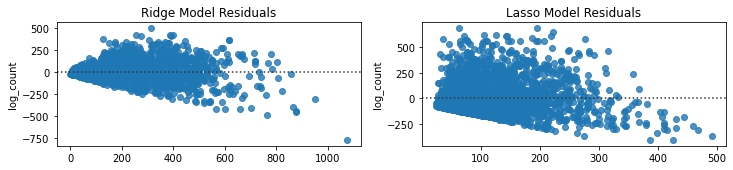

In [64]:
fig = plt.figure(figsize = (12,5))
ax1 = plt.subplot(2,2,1) # r, c, fignum
ax1.title.set_text('Ridge Model Residuals')
#ax1.set(xlabel='Predicted', ylabel='Real')
sns.residplot(x = y_preds_ridge, y = y_test)

ax2 = plt.subplot(2,2,2) # r, c, fignum
ax2.title.set_text('Lasso Model Residuals')
#ax2.set(xlabel='Predicted', ylabel='Re')
sns.residplot(x = y_preds_lasso, y = y_test)

<AxesSubplot:title={'center':'Lasso Model Predictions'}, xlabel='Predicted', ylabel='Real'>

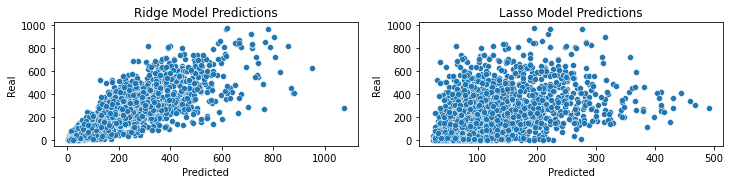

In [54]:
#plt.figure(figsize = (12,5))
#plt.subplot(2,2,1) # r, c, fignum
#sns.scatterplot(y = y_test, x = y_preds_ridge)
#plt.subplot(2,2,2) # r, c, fignum
#sns.scatterplot(y = y_test, x = y_preds_lasso)


fig = plt.figure(figsize = (12,5))
ax3 = plt.subplot(2,2,1) # r, c, fignum
ax3.title.set_text('Ridge Model Predictions')
ax3.set(xlabel='Predicted', ylabel='Real')
sns.scatterplot(x = y_preds_ridge, y = y_test)

ax4 = plt.subplot(2,2,2) # r, c, fignum
ax4.title.set_text('Lasso Model Predictions')
ax4.set(xlabel='Predicted', ylabel='Real')
sns.scatterplot(x = y_preds_lasso, y = y_test)

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.title.set_text('First Plot')
ax2.title.set_text('Second Plot')
ax3.title.set_text('Third Plot')
ax4.title.set_text('Fourth Plot')
plt.show()

In [70]:
train_scores, valid_scores = validation_curve(Ridge(), X, y_log, "alpha", np.logspace(-7, 3, 3), cv=5)

/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass param_name=alpha, param_range=[1.e-07 1.e-02 1.e+03] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/naimboraatlay/opt

/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 545, in fit
    multi_output=True, y_numeric=True)
  File "/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/naimboraatlay/opt/anacon

/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 545, in fit
    multi_output=True, y_numeric=True)
  File "/Users/naimboraatlay/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/naimboraatlay/opt/anacon

## 